## **Overview-**
In this project, we will cover data collection using web API (from World Bank website), python, pandas, and Tableau to perform analyses on World Bank G20 Country Data.

**Author** : *Anuroop Arya*

In [2]:
!pip install wbdata

In [3]:
#Importing pandas for data manipulation and analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
from datetime import datetime

In [4]:
# Fetch all indicators
indicators = wbdata.get_indicators()

# Filter indicators related to GDP
gdp_indicators = {indicator['id']: indicator['name'] for indicator in indicators if 'GDP' in indicator['name']}

# Print the filtered indicators
for indicator_id, indicator_name in gdp_indicators.items():
    print(f"{indicator_id}: {indicator_name}")

6.0.GDP_current: GDP (current $)
6.0.GDP_growth: GDP growth (annual %)
6.0.GDP_usd: GDP (constant 2005 $)
6.0.GDPpc_constant: GDP per capita, PPP (constant 2011 international $) 
BG.GSR.NFSV.GD.ZS: Trade in services (% of GDP)
BG.KAC.FNEI.GD.PP.ZS: Gross private capital flows (% of GDP, PPP)
BG.KAC.FNEI.GD.ZS: Gross private capital flows (% of GDP)
BG.KLT.DINV.GD.PP.ZS: Gross foreign direct investment (% of GDP, PPP)
BG.KLT.DINV.GD.ZS: Gross foreign direct investment (% of GDP)
BI.WAG.TOTL.GD.ZS: Wage bill as a percentage of GDP
BM.GSR.MRCH.ZS: Merchandise imports (BOP): percentage of GDP (%)
BM.KLT.DINV.GD.ZS: Foreign direct investment, net outflows (% of GDP)
BM.KLT.DINV.WD.GD.ZS: Foreign direct investment, net outflows (% of GDP)
BN.CAB.XOKA.GD.ZS: Current account balance (% of GDP)
BN.CAB.XOKA.GDP.ZS: Current account balance (% of GDP)
BN.CAB.XOTR.ZS: Curr. acc. bal. before official transf. (% of GDP)
BN.CUR.GDPM.ZS: Current account balance excluding net official capital grants (% 

In [5]:
import datetime
# Define start and end dates
start_date = "2018-01-01"
end_date = "2022-12-31"

# Convert dates to datetime objects
start_date_obj = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.datetime.strptime(end_date, "%Y-%m-%d")


In [6]:


# Define the indicators
indicators = [
    {"Indicator Name": "Gross Domestic Product (GDP)", "Indicator ID": "NY.GDP.MKTP.CD"},
    {"Indicator Name": "Gross National Income (GNI)", "Indicator ID": "NY.GNP.MKTP.CD"},
    {"Indicator Name": "Inflation rate", "Indicator ID": "FP.CPI.TOTL.ZG"},
    {"Indicator Name": "Unemployment rate", "Indicator ID": "SL.UEM.TOTL.ZS"},
    {"Indicator Name": "Poverty rate", "Indicator ID": "SI.POV.NAHC"},
    {"Indicator Name": "Life expectancy", "Indicator ID": "SP.DYN.LE00.IN"},
    {"Indicator Name": "Literacy rate", "Indicator ID": "SE.ADT.LITR.ZS"},
    {"Indicator Name": "Access to electricity", "Indicator ID": "EG.ELC.ACCS.ZS"},
    {"Indicator Name": "Mobile phone subscriptions", "Indicator ID": "IT.CEL.SETS.P2"},
    {"Indicator Name": "Government expenditure on education", "Indicator ID": "SE.XPD.TOTL.GB.ZS"},
    {"Indicator Name": "Foreign direct investment (FDI)", "Indicator ID": "BX.KLT.DINV.WD.GD.ZS"},
    {"Indicator Name": "Exports of goods and services", "Indicator ID": "NE.EXP.GNFS.ZS"},
    {"Indicator Name": "Imports of goods and services", "Indicator ID": "NE.IMP.GNFS.ZS"},
    {"Indicator Name": "Gross capital formation", "Indicator ID": "NE.GDI.TOTL.ZS"},
    {"Indicator Name": "Agricultural land area", "Indicator ID": "AG.LND.AGRI.ZS"},
    {"Indicator Name": "Agricultural production index", "Indicator ID": "AG.PRD.FOOD.XD"}
]

# Define the date range
start_date = "2018-01-01"
end_date = "2022-12-31"
start_date_obj = datetime.datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.datetime.strptime(end_date, "%Y-%m-%d")

# Initialize an empty DataFrame to hold the combined data
df = pd.DataFrame()

# Fetch data for each indicator
for indicator in indicators:
    i = indicator['Indicator ID']
    new_df = wbdata.get_dataframe({i: indicator['Indicator Name']}, country='all', date=(start_date_obj, end_date_obj))
    new_df = new_df.reset_index()
    new_df.columns = ['country', 'year', indicator['Indicator Name']]

# Merge with the main DataFrame
    if df.empty:
        df = new_df
    else:
        df = pd.merge(df, new_df, on=['country', 'year'], how='outer')



In [7]:
# Display the combined DataFrame

df.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Africa Eastern and Southern,2022,1.183962e+12,1.152520e+12,10.883478,7.448222,NaN,62.899031,72.600403,48.711995,78.380607,14.093000,1.718270,27.595354,29.981201,21.117891,NaN,NaN
1,Africa Eastern and Southern,2021,1.086772e+12,1.061094e+12,6.824727,7.964493,NaN,62.454590,72.581161,48.100862,75.858421,15.516000,5.038473,25.922406,26.386120,20.108447,46.485779,NaN
2,Africa Eastern and Southern,2020,9.290741e+11,9.096830e+11,7.321106,7.661161,NaN,63.313860,72.785622,46.264875,71.060934,15.502000,1.481455,22.036160,24.272847,20.382308,46.467608,NaN
3,Africa Eastern and Southern,2019,1.006527e+12,9.783052e+11,4.653665,7.244670,NaN,63.755678,72.634972,44.381259,68.736999,15.292000,1.497207,23.903124,26.762880,21.469617,46.419375,NaN
4,Africa Eastern and Southern,2018,1.012719e+12,9.840995e+11,4.720805,7.068440,NaN,63.365863,71.392616,43.017148,72.317182,17.221001,1.337747,25.315921,28.551325,20.880480,46.361118,NaN


In [8]:
df_1 = df.copy()

In [9]:
df_1 = df_1.drop(['country','year'],axis=1)

In [10]:
df_1.head()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,1.183962e+12,1.152520e+12,10.883478,7.448222,NaN,62.899031,72.600403,48.711995,78.380607,14.093000,1.718270,27.595354,29.981201,21.117891,NaN,NaN
1,1.086772e+12,1.061094e+12,6.824727,7.964493,NaN,62.454590,72.581161,48.100862,75.858421,15.516000,5.038473,25.922406,26.386120,20.108447,46.485779,NaN
2,9.290741e+11,9.096830e+11,7.321106,7.661161,NaN,63.313860,72.785622,46.264875,71.060934,15.502000,1.481455,22.036160,24.272847,20.382308,46.467608,NaN
3,1.006527e+12,9.783052e+11,4.653665,7.244670,NaN,63.755678,72.634972,44.381259,68.736999,15.292000,1.497207,23.903124,26.762880,21.469617,46.419375,NaN
4,1.012719e+12,9.840995e+11,4.720805,7.068440,NaN,63.365863,71.392616,43.017148,72.317182,17.221001,1.337747,25.315921,28.551325,20.880480,46.361118,NaN


In [11]:
df.iloc[:,0:2]

,country,year
0,Africa Eastern and Southern,2022
1,Africa Eastern and Southern,2021
2,Africa Eastern and Southern,2020
3,Africa Eastern and Southern,2019
4,Africa Eastern and Southern,2018
...,...,...
1325,Zimbabwe,2022
1326,Zimbabwe,2021
1327,Zimbabwe,2020
1328,Zimbabwe,2019


In [12]:
df_1 = pd.concat([df.iloc[:,0:2],df_1],axis=1)

In [13]:
df_1.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Africa Eastern and Southern,2022,1.183962e+12,1.152520e+12,10.883478,7.448222,NaN,62.899031,72.600403,48.711995,78.380607,14.093000,1.718270,27.595354,29.981201,21.117891,NaN,NaN
1,Africa Eastern and Southern,2021,1.086772e+12,1.061094e+12,6.824727,7.964493,NaN,62.454590,72.581161,48.100862,75.858421,15.516000,5.038473,25.922406,26.386120,20.108447,46.485779,NaN
2,Africa Eastern and Southern,2020,9.290741e+11,9.096830e+11,7.321106,7.661161,NaN,63.313860,72.785622,46.264875,71.060934,15.502000,1.481455,22.036160,24.272847,20.382308,46.467608,NaN
3,Africa Eastern and Southern,2019,1.006527e+12,9.783052e+11,4.653665,7.244670,NaN,63.755678,72.634972,44.381259,68.736999,15.292000,1.497207,23.903124,26.762880,21.469617,46.419375,NaN
4,Africa Eastern and Southern,2018,1.012719e+12,9.840995e+11,4.720805,7.068440,NaN,63.365863,71.392616,43.017148,72.317182,17.221001,1.337747,25.315921,28.551325,20.880480,46.361118,NaN


In [14]:
# All the g20 countries
countries=['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States']

In [15]:
dff = df_1[df_1['country'].isin(countries)]

In [16]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
280,Argentina,2022,6.311334e+11,6.191449e+11,NaN,6.805,39.2,76.064,NaN,100.0,132.357810,NaN,2.441377,16.299562,15.350952,17.625045,NaN,109.39
281,Argentina,2021,4.879026e+11,4.780617e+11,NaN,8.736,37.3,75.390,NaN,100.0,130.455008,12.28490,1.414799,17.996588,14.933436,18.057340,43.102346,108.40
282,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.892,NaN,100.0,121.600189,12.42229,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
283,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,77.284,NaN,100.0,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
284,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.221,32.0,76.999,NaN,100.0,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.51


In [17]:
dff.shape

(85, 18)

In [18]:
dff.reset_index(drop=True, inplace=True)

In [19]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2022,6.311334e+11,6.191449e+11,NaN,6.805,39.2,76.064000,NaN,100.0,132.357810,NaN,2.441377,16.299562,15.350952,17.625045,NaN,109.39
1,Argentina,2021,4.879026e+11,4.780617e+11,NaN,8.736,37.3,75.390000,NaN,100.0,130.455008,12.284900,1.414799,17.996588,14.933436,18.057340,43.102346,108.40
2,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.892000,NaN,100.0,121.600189,12.422290,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
3,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,77.284000,NaN,100.0,125.940981,12.530070,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
4,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.221,32.0,76.999000,NaN,100.0,131.937169,12.523340,2.232532,14.436686,16.325850,16.613885,42.371536,97.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,United States,2022,2.574411e+13,2.592600e+13,8.002800,3.650,NaN,77.434146,NaN,100.0,110.166472,NaN,1.507444,11.633909,15.406108,21.882308,NaN,100.86
81,United States,2021,2.359403e+13,2.377760e+13,4.697859,5.349,NaN,76.329268,NaN,100.0,107.319451,NaN,2.089872,10.807979,14.445505,21.374194,44.363367,104.57
82,United States,2020,2.132295e+13,2.147959e+13,1.233584,8.055,NaN,76.980488,NaN,100.0,104.935375,12.654216,0.648892,10.083558,13.021195,21.408023,44.363367,103.12
83,United States,2019,2.152140e+13,2.176085e+13,1.812210,3.669,NaN,78.787805,NaN,100.0,106.414019,15.517134,1.468232,11.795007,14.483048,21.687116,44.363367,99.64


### **Exploring The Data**

In [20]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2022,6.311334e+11,6.191449e+11,NaN,6.805,39.2,76.064,NaN,100.0,132.357810,NaN,2.441377,16.299562,15.350952,17.625045,NaN,109.39
1,Argentina,2021,4.879026e+11,4.780617e+11,NaN,8.736,37.3,75.390,NaN,100.0,130.455008,12.28490,1.414799,17.996588,14.933436,18.057340,43.102346,108.40
2,Argentina,2020,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.892,NaN,100.0,121.600189,12.42229,1.266169,16.605414,13.598284,14.415156,43.029265,108.57
3,Argentina,2019,4.477547e+11,4.301668e+11,NaN,9.843,35.5,77.284,NaN,100.0,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,42.590779,112.42
4,Argentina,2018,5.248199e+11,5.060940e+11,NaN,9.221,32.0,76.999,NaN,100.0,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,42.371536,97.51


In [21]:
dff.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              85 non-null     object 
 1   year                                 85 non-null     object 
 2   Gross Domestic Product (GDP)         85 non-null     float64
 3   Gross National Income (GNI)          85 non-null     float64
 4   Inflation rate                       80 non-null     float64
 5   Unemployment rate                    85 non-null     float64
 6   Poverty rate                         30 non-null     float64
 7   Life expectancy                      85 non-null     float64
 8   Literacy rate                        13 non-null     float64
 9   Access to electricity                85 non-null     float64
 10  Mobile phone subscriptions           85 non-null     float64
 11  Government expenditure on education  6

In [22]:
dff['year'] = pd.to_datetime(dff['year'])

<ipython-input-22-18bf285ab950>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['year'] = pd.to_datetime(dff['year'])


In [23]:
from warnings import filterwarnings
filterwarnings("ignore")

In [24]:
dff.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              85 non-null     object        
 1   year                                 85 non-null     datetime64[ns]
 2   Gross Domestic Product (GDP)         85 non-null     float64       
 3   Gross National Income (GNI)          85 non-null     float64       
 4   Inflation rate                       80 non-null     float64       
 5   Unemployment rate                    85 non-null     float64       
 6   Poverty rate                         30 non-null     float64       
 7   Life expectancy                      85 non-null     float64       
 8   Literacy rate                        13 non-null     float64       
 9   Access to electricity                85 non-null     float64       
 10  Mobile phone subscri

### **Descriptive Summary**

In [25]:
dff.describe().T

,count,mean,min,25%,50%,75%,max,std
year,85,2020-01-01 09:36:00,2018-01-01 00:00:00,2019-01-01 00:00:00,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00,NaN
Gross Domestic Product (GDP),85.0,4001578070422.075195,338291396026.697998,1108571466666.669922,1916933898038.360107,3167270623260.52002,25744108000000.0,5844976676593.735352
Gross National Income (GNI),85.0,4018645559874.814941,332655390435.870972,1084976604944.109985,1895345889306.100098,3158743956476.279785,25926000000000.0,5878159703221.206055
Inflation rate,80.0,4.677422,-2.093333,1.709709,2.96491,4.957364,72.308836,8.487956
Unemployment rate,85.0,7.617859,2.351,3.896,5.69,9.221,28.838,5.593513
Poverty rate,30.0,19.546667,0.0,10.925,15.3,29.025,43.9,12.831527
Life expectancy,85.0,77.197179,61.48,74.202,77.905,82.058537,84.56,5.669505
Literacy rate,13.0,93.997372,76.322777,94.690002,95.379913,96.739517,99.349098,5.753919
Access to electricity,85.0,98.977647,84.7,99.9,100.0,100.0,100.0,3.142806
Mobile phone subscriptions,85.0,117.395261,80.648577,100.288198,117.816313,129.679475,168.924391,21.57997


In [26]:
#converting this to billion-dollar

dff['GDP_BN'] = dff['Gross Domestic Product (GDP)']/(10**9)
dff['GNI_BN'] = dff['Gross National Income (GNI)']/(10**9)

In [27]:
selected_cols = dff.columns[4:]

In [28]:
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [29]:
dff[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,80.0,5.0,8.0,-2.0,2.0,3.0,5.0,72.0
Unemployment rate,85.0,8.0,6.0,2.0,4.0,6.0,9.0,29.0
Poverty rate,30.0,20.0,13.0,0.0,11.0,15.0,29.0,44.0
Life expectancy,85.0,77.0,6.0,61.0,74.0,78.0,82.0,85.0
Literacy rate,13.0,94.0,6.0,76.0,95.0,95.0,97.0,99.0
Access to electricity,85.0,99.0,3.0,85.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,85.0,117.0,22.0,81.0,100.0,118.0,130.0,169.0
Government expenditure on education,66.0,12.0,3.0,7.0,10.0,12.0,15.0,20.0
Foreign direct investment (FDI),85.0,2.0,1.0,-1.0,1.0,2.0,3.0,10.0
Exports of goods and services,85.0,27.0,10.0,10.0,19.0,27.0,33.0,51.0


### **Distribution** - Histogram

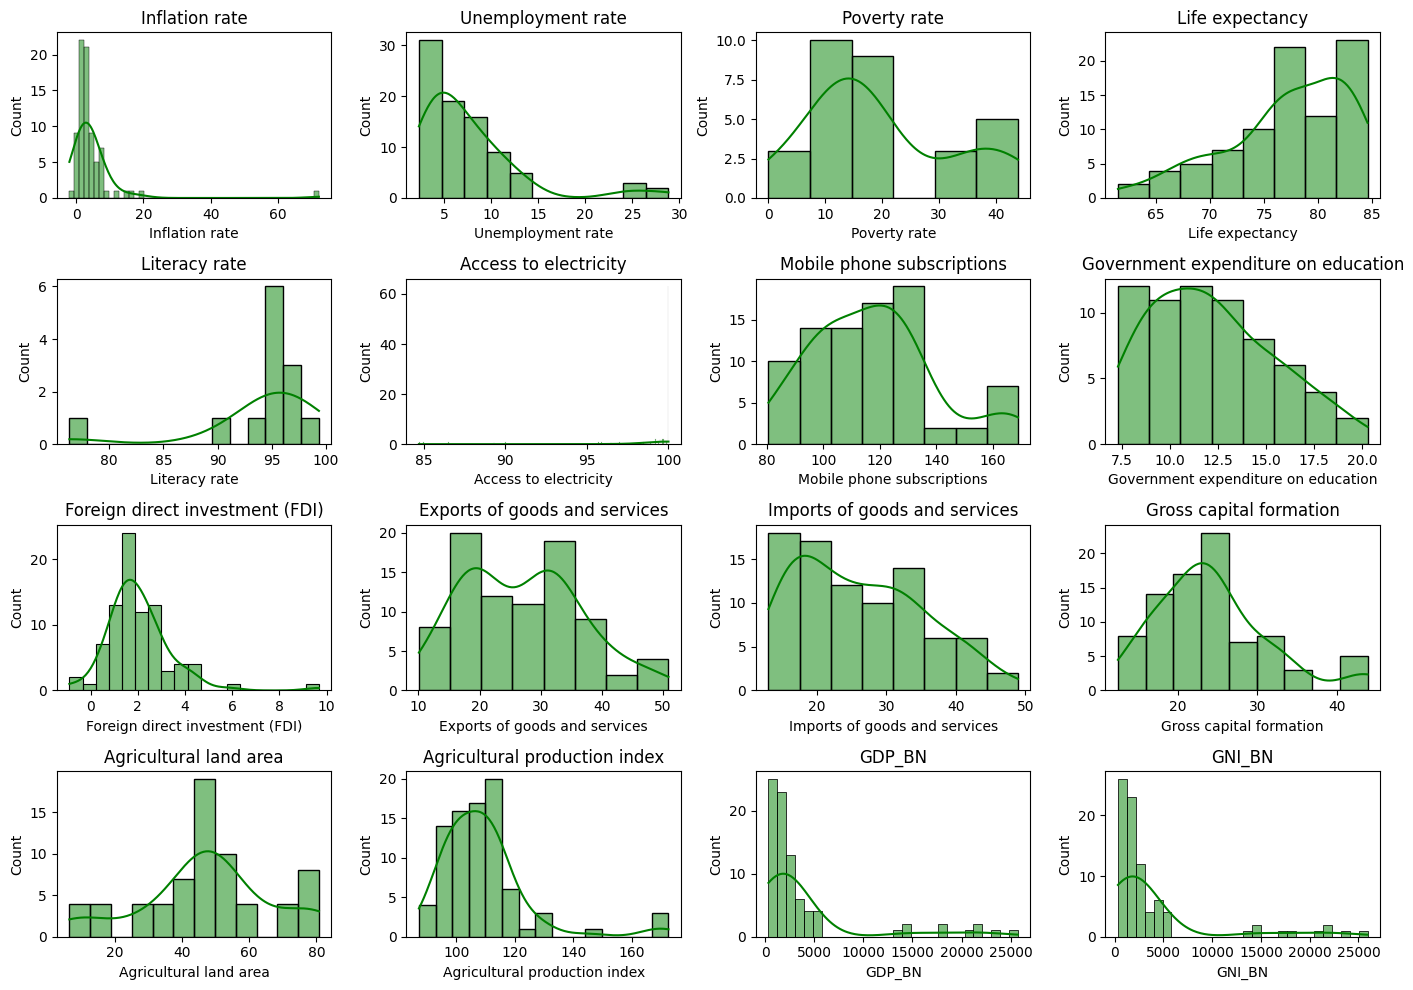

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))

# Flatten the 2D array of axes into a 1D array
axs = axs.flatten()

# Iterate over each selected column and plot a histogram with KDE
for i, col in enumerate(selected_cols):
    sns.histplot(data=dff, x=col, kde=True, ax=axs[i], color='green')
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [31]:
# Compute skewness for each column in selected_cols and sort them
dff[selected_cols].skew().sort_values()

Access to electricity                 -3.625473
Literacy rate                         -2.753611
Life expectancy                       -0.845738
Agricultural land area                -0.252786
Exports of goods and services          0.356108
Imports of goods and services          0.474957
Government expenditure on education    0.512178
Mobile phone subscriptions             0.594250
Poverty rate                           0.609506
Gross capital formation                0.977549
Foreign direct investment (FDI)        2.074196
Unemployment rate                      2.298185
Agricultural production index          2.356385
GNI_BN                                 2.461916
GDP_BN                                 2.463708
Inflation rate                         6.674165
dtype: float64

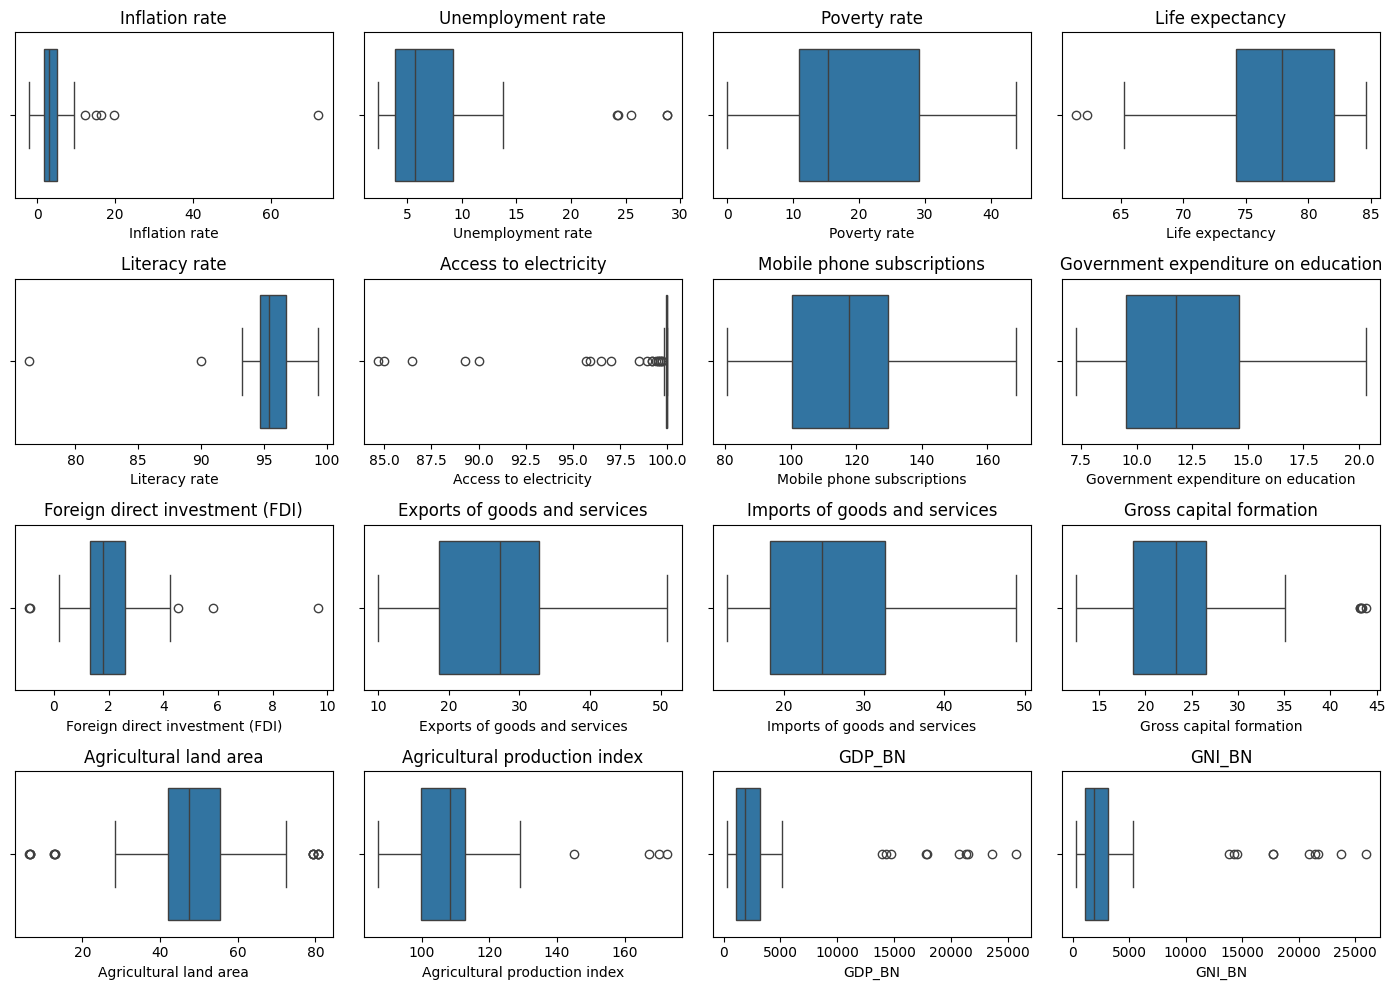

In [32]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,10))
axs = axs.flatten()

for i, col in enumerate(selected_cols):
    sns.boxplot(data=dff, x=col, ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

The data show considerable diversity among countries in these key indicators, with some outliers indicating extreme values.

### **Outlier Proportion**

In [33]:
"""
      Detect outliers in a numerical series using the IQR method.

Parameters:
    - x: A pandas Series or DataFrame column containing numerical data.

Returns:
    - A boolean Series indicating True for outliers and False otherwise.
"""


def outlier(x):
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    iqr = q3 - q1
 # Determine outliers using the IQR method
    return ( x < q1-1.5*iqr) | (x>q3+1.5*iqr)

In [34]:

# Initialize an empty list to store outlier percentages

outlier_percentages = []


# Iterate over each column in selected_cols
for col in selected_cols:
    x = dff[col]
    outliers = outlier(x)                           # Detect outliers using the previously defined outlier function
    outlier_percentage = np.mean(outliers)*100      # Calculate the percentage of outliers
    outlier_percentages.append(outlier_percentage)  # Append the outlier percentage to the list

# Create a DataFrame to store results with columns 'Column' and 'Outlier Percentage'
result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})


# Sort the DataFrame by 'Outlier Percentage' in descending order
result_df = result_df.sort_values('Outlier Percentage', ascending=False)

In [35]:
result_df.round()

,Column,Outlier Percentage
5,Access to electricity,24.0
12,Agricultural land area,19.0
14,GDP_BN,12.0
15,GNI_BN,12.0
0,Inflation rate,6.0
1,Unemployment rate,6.0
8,Foreign direct investment (FDI),6.0
11,Gross capital formation,6.0
13,Agricultural production index,5.0
3,Life expectancy,2.0


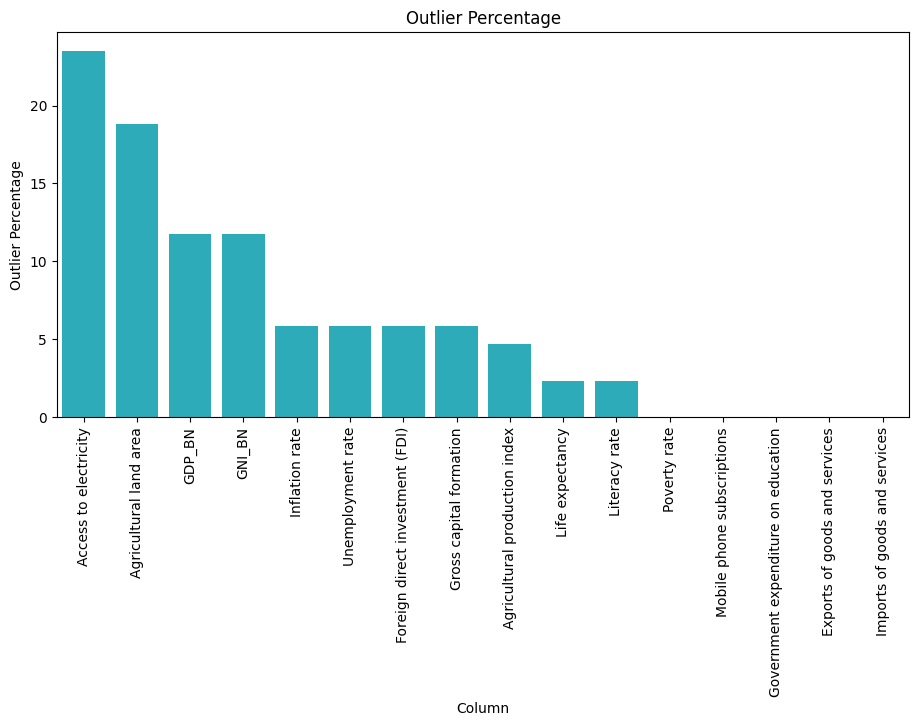

In [36]:
plt.figure(figsize=(11, 5))
sns.barplot(x=result_df['Column'], y=result_df['Outlier Percentage'], color='#17becf')
plt.title("Outlier Percentage")
plt.xticks(rotation=90)
plt.show()

### **Outlier Percentage**

#### High Outlier Percentages:
- **Access to electricity**: Over 20% outliers, indicating significant variability.
- **Agricultural land area**: Around 17% outliers, showing considerable variability.
- **GDP_BN and GNI_BN**: Both around 12% outliers, reflecting variability in economic size and income.

In [37]:
dff.isnull().sum()

country                                 0
year                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          5
Unemployment rate                       0
Poverty rate                           55
Life expectancy                         0
Literacy rate                          72
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education    19
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                 17
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

### **Correlation**

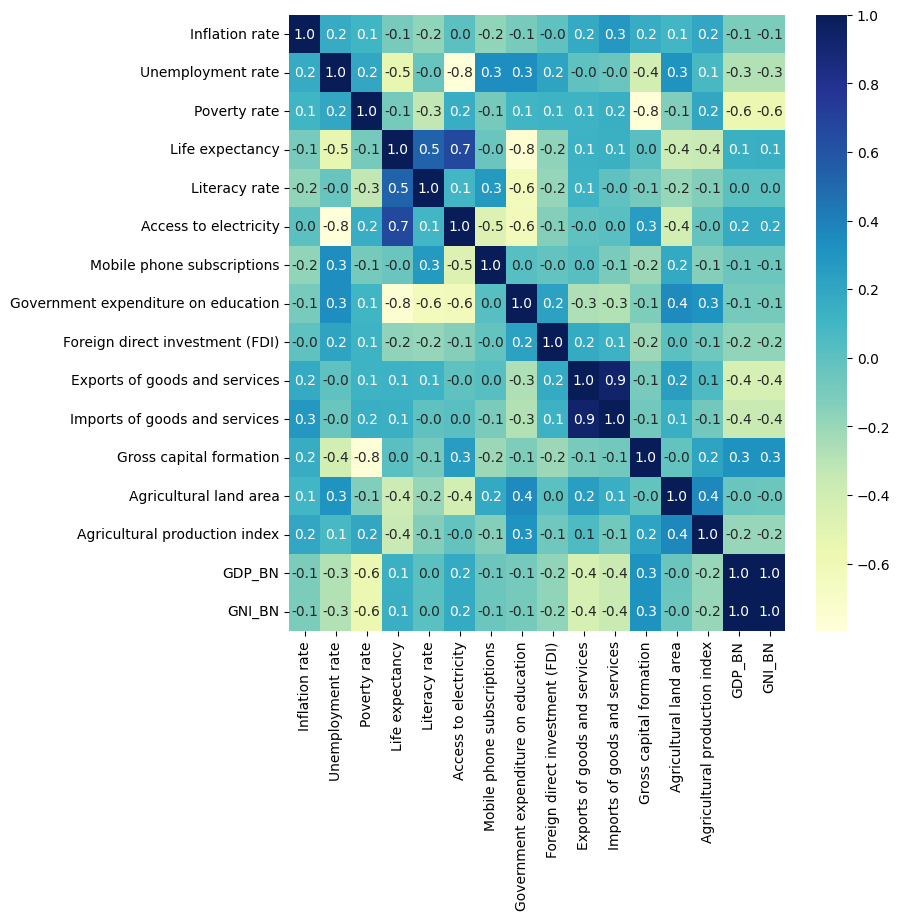

In [38]:
plt.figure(figsize=(8, 8))
sns.heatmap(dff[selected_cols].corr(), annot=True, fmt='.1f', cmap='YlGnBu')
plt.show()

### High Correlations:

- **Poverty rate and Unemployment rate**: Strong positive correlation (0.5). Higher poverty rates are associated with higher unemployment rates.
- **Life expectancy and Literacy rate**: Strong positive correlation (0.5). Higher literacy rates are associated with higher life expectancy.
- **Access to electricity and Life expectancy**: Moderate positive correlation (0.7). Better access to electricity tends to be associated with higher life expectancy.
- **Exports of goods and services and Imports of goods and services**: Very strong positive correlation (0.9). Countries with high export volumes tend to also have high import volumes.
- **GDP_BN and GNI_BN**: Perfect positive correlation (1.0). GDP and GNI are directly proportional and usually very close in value.




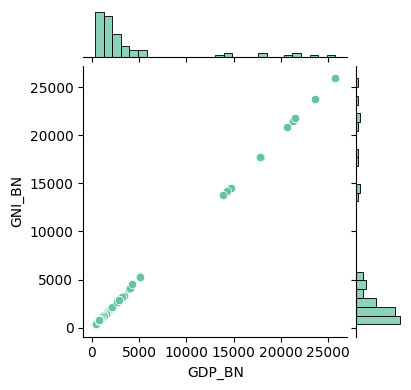

In [39]:
sns.jointplot(x='GDP_BN', y='GNI_BN', data=dff, height=4, color='#66c2a5')
plt.show()

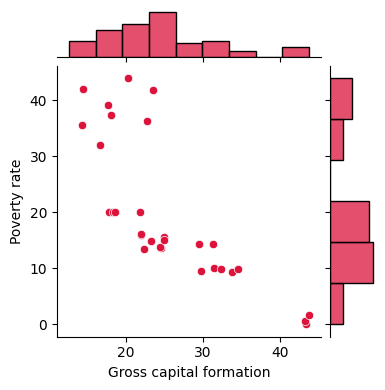

In [40]:
sns.jointplot(x='Gross capital formation', y='Poverty rate', data=dff, height=4, color='crimson')
plt.show()

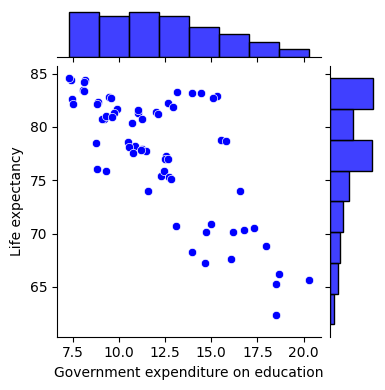

In [41]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=dff, height=4, color='blue')
plt.show()

In [42]:
"""
    Extracts the top 3 countries by a specified parameter for each year from a given dataset.

    Parameters:
    - data: DataFrame containing data with columns 'year', 'country', and the specified parameter.
    - parameter: Name of the parameter column to aggregate and find top values.

    Returns:
    - result_df: DataFrame with the top 3 countries for each year as columns, indexed by 1, 2, 3.
"""




def top_3(data, parameter):
    year_list = data['year'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list,index=[1,2,3])

    for year in year_list:
        df_year = data[data['year'].dt.year == year]                                                     # Filter data for the current year
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index   # Group by 'country', sum the values of 'parameter', and get top 3 countries by sum
        result_df[year] = value                                                                          # Assign the top 3 countries for the current year to the result DataFrame

    return result_df

In [43]:
# Identify and display the top 3 countries for each year based on the summed values of various parameters

from IPython.display import display
for i in selected_cols:
    result = top_3(dff,i)
    print(i)
    display(result)
    print('=======================================================================================')

Inflation rate


,2018,2019,2020,2021,2022
1,Turkiye,Turkiye,Turkiye,Turkiye,Turkiye
2,Mexico,South Africa,India,Brazil,Brazil
3,South Africa,Brazil,Saudi Arabia,Mexico,Italy


Unemployment rate


,2018,2019,2020,2021,2022
1,South Africa,South Africa,South Africa,South Africa,South Africa
2,Brazil,Turkiye,Brazil,Brazil,Turkiye
3,Turkiye,Brazil,Turkiye,Turkiye,Brazil


Poverty rate


,2018,2019,2020,2021,2022
1,Mexico,Argentina,Mexico,Argentina,Argentina
2,Argentina,Italy,Argentina,Italy,Mexico
3,Italy,Germany,Italy,France,Indonesia


Life expectancy


,2018,2019,2020,2021,2022
1,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Australia,Australia,Australia
3,Australia,Australia,Italy,Italy,Italy


Literacy rate


,2018,2019,2020,2021,2022
1,Indonesia,Italy,Saudi Arabia,South Africa,Brazil
2,Mexico,Turkiye,China,Argentina,India
3,Brazil,South Africa,Indonesia,Italy,Argentina


Access to electricity


,2018,2019,2020,2021,2022
1,Argentina,Argentina,Argentina,Argentina,Argentina
2,Australia,Australia,Australia,Australia,Australia
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


Mobile phone subscriptions


,2018,2019,2020,2021,2022
1,South Africa,South Africa,South Africa,South Africa,Japan
2,Japan,Japan,Japan,Japan,South Africa
3,Italy,Italy,Indonesia,Indonesia,Italy


Government expenditure on education


,2018,2019,2020,2021,2022
1,South Africa,South Africa,South Africa,South Africa,Australia
2,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Mexico,United States,Mexico,India,Canada


Foreign direct investment (FDI)


,2018,2019,2020,2021,2022
1,Australia,Brazil,United Kingdom,South Africa,Australia
2,Germany,Canada,Germany,France,Brazil
3,Brazil,Australia,Mexico,Canada,France


Exports of goods and services


,2018,2019,2020,2021,2022
1,Germany,Germany,Germany,Germany,Germany
2,Mexico,Mexico,Mexico,Mexico,Mexico
3,Saudi Arabia,Saudi Arabia,United Kingdom,Turkiye,Saudi Arabia


Imports of goods and services


,2018,2019,2020,2021,2022
1,Germany,Germany,Germany,Mexico,Germany
2,Mexico,Mexico,Mexico,Germany,Mexico
3,Canada,Canada,Turkiye,Turkiye,Turkiye


Gross capital formation


,2018,2019,2020,2021,2022
1,China,China,China,China,China
2,Indonesia,Indonesia,Indonesia,India,Turkiye
3,India,India,Turkiye,Indonesia,India


Agricultural land area


,2018,2019,2020,2021,2022
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Argentina
2,South Africa,South Africa,South Africa,South Africa,Italy
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


Agricultural production index


,2018,2019,2020,2021,2022
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Indonesia,India,Turkiye,India,Turkiye
3,India,Turkiye,India,Turkiye,India


GDP_BN


,2018,2019,2020,2021,2022
1,United States,United States,United States,United States,United States
2,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan


GNI_BN


,2018,2019,2020,2021,2022
1,United States,United States,United States,United States,United States
2,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan


In [44]:
dff['year_o'] = dff['year'].dt.year

### **Life Expectancy**

In [45]:
# Create a pivot table to calculate the average life expectancy for each country by year
life_expectancy = pd.pivot_table(columns='year_o', index='country', values='Life expectancy', data=dff, aggfunc='mean').round(1)
life_expectancy.columns

Index([2018, 2019, 2020, 2021, 2022], dtype='int32', name='year_o')

In [46]:
life_expectancy

year_o,2018,2019,2020,2021,2022
country,,,,,
Argentina,77.0,77.3,75.9,75.4,76.1
Australia,82.7,82.9,83.2,83.3,83.2
Brazil,75.1,75.3,74.0,72.8,73.4
Canada,81.8,82.2,81.7,81.6,81.3
China,77.7,78.0,78.1,78.2,78.6
France,82.7,82.8,82.2,82.3,82.2
Germany,80.9,81.3,81.0,80.8,80.7
India,70.7,70.9,70.2,67.2,67.7
Indonesia,70.3,70.5,68.8,67.6,68.2


In [47]:
life_expectancy['perc_chg'] = round((life_expectancy[2022] - life_expectancy[2018])*100/life_expectancy[2018],1)

In [48]:
life_expectancy = life_expectancy.sort_values(ascending=False, by='perc_chg')

In [49]:
life_expectancy

year_o,2018,2019,2020,2021,2022,perc_chg
country,,,,,,
China,77.7,78.0,78.1,78.2,78.6,1.2
Turkiye,77.6,77.8,75.8,76.0,78.5,1.2
Mexico,74.0,74.2,70.1,70.2,74.8,1.1
United Kingdom,81.3,81.4,80.4,80.7,82.1,1.0
Saudi Arabia,77.2,77.3,76.2,76.9,77.9,0.9
Australia,82.7,82.9,83.2,83.3,83.2,0.6
Germany,80.9,81.3,81.0,80.8,80.7,-0.2
Japan,84.2,84.4,84.6,84.4,84.0,-0.2
Italy,83.3,83.5,82.2,82.6,82.9,-0.5


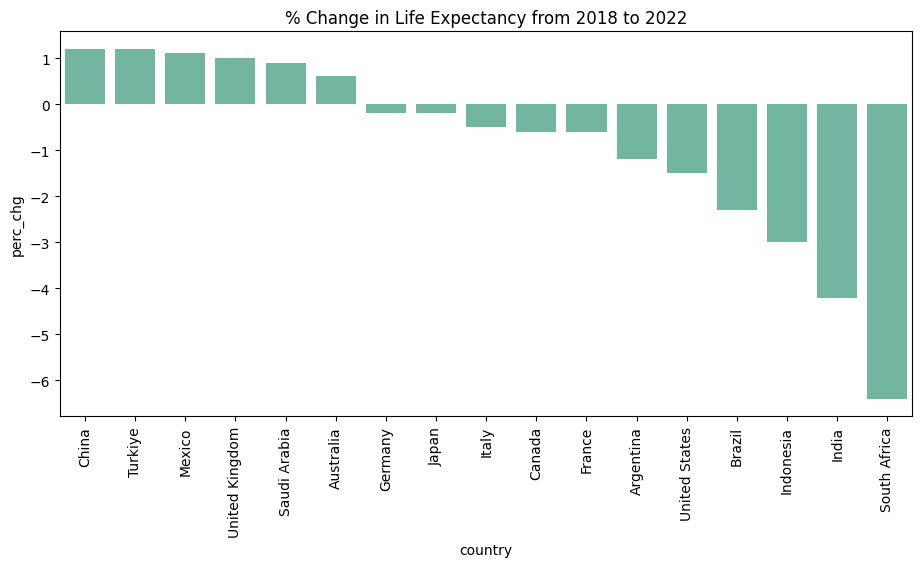

In [64]:
plt.figure(figsize=(11, 5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['perc_chg'], color='#66c2a5')
plt.title("% Change in Life Expectancy from 2018 to 2022")
plt.xticks(rotation=90)
plt.show()

**Positive Trends**: Some countries, particularly in Asia and the Middle East, improved life expectancy during this period.

**Negative Trends**: Others, especially in South America, Africa, and parts of
Asia, faced declines in life expectancy, with South Africa having the most substantial reduction.

In [52]:
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=dff, aggfunc='mean').round(1)
fdi['perc_chg'] = round((fdi[2022] - fdi[2018])*100/fdi[2018],1)
fdi = fdi.sort_values(ascending=False, by='perc_chg')

In [53]:
fdi

year_o,2018,2019,2020,2021,2022,perc_chg
country,,,,,,
Japan,0.5,0.8,1.2,0.7,1.2,140.0
Saudi Arabia,1.4,0.4,0.2,2.6,2.5,78.6
South Africa,1.4,1.3,0.9,9.7,2.3,64.3
United States,1.0,1.5,0.6,2.1,1.5,50.0
Italy,2.1,1.8,-0.9,1.2,3.0,42.9
France,2.8,2.0,0.7,3.2,3.8,35.7
Argentina,2.2,1.5,1.3,1.4,2.4,9.1
Indonesia,1.8,2.2,1.8,1.8,1.9,5.6
Australia,4.2,2.8,1.2,1.8,4.1,-2.4


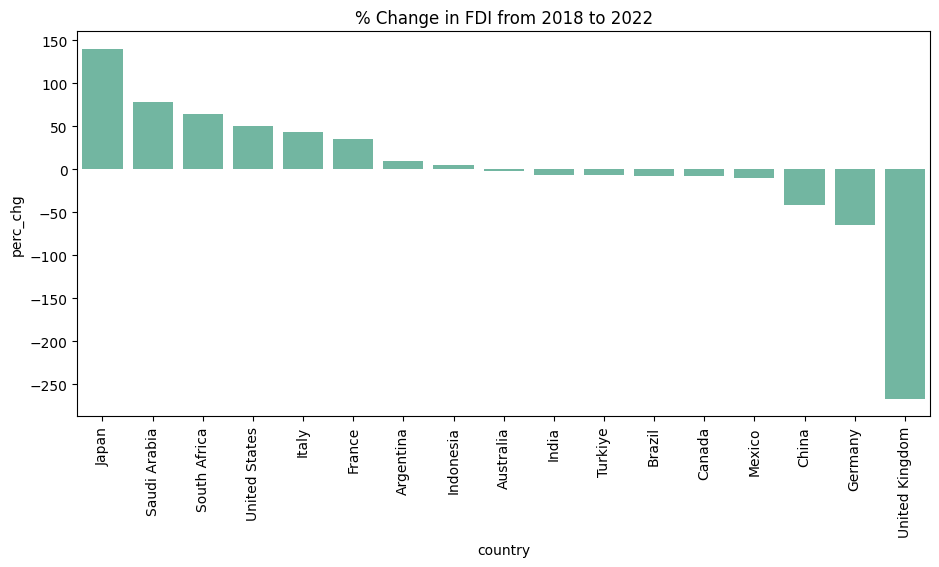

In [63]:
plt.figure(figsize=(11, 5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], color='#66c2a5')
plt.title("% Change in FDI from 2018 to 2022")
plt.xticks(rotation=90)
plt.show()

**Positive Trends:** Several countries, especially in Asia, Africa, and North America, saw significant increases in FDI, indicating growing investor confidence.

**Negative Trends**: A few countries, notably the United Kingdom and Germany, experienced significant drops in FDI, which may reflect economic or political challenges during this period.

**Exim**

In [65]:
dff['net_exim_bal'] = dff['Exports of goods and services'] - dff['Imports of goods and services']


In [59]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,net_exim_bal
0,Argentina,2022-01-01,6.311334e+11,6.191449e+11,NaN,6.805,39.2,76.064,NaN,100.0,...,2.441377,16.299562,15.350952,17.625045,NaN,109.39,631.133384,619.144891,2022,0.948609
1,Argentina,2021-01-01,4.879026e+11,4.780617e+11,NaN,8.736,37.3,75.390,NaN,100.0,...,1.414799,17.996588,14.933436,18.057340,43.102346,108.40,487.902572,478.061739,2021,3.063152
2,Argentina,2020-01-01,3.857405e+11,3.753441e+11,NaN,11.461,42.0,75.892,NaN,100.0,...,1.266169,16.605414,13.598284,14.415156,43.029265,108.57,385.740508,375.344057,2020,3.007130
3,Argentina,2019-01-01,4.477547e+11,4.301668e+11,NaN,9.843,35.5,77.284,NaN,100.0,...,1.485007,17.924878,14.705737,14.210030,42.590779,112.42,447.754684,430.166792,2019,3.219142
4,Argentina,2018-01-01,5.248199e+11,5.060940e+11,NaN,9.221,32.0,76.999,NaN,100.0,...,2.232532,14.436686,16.325850,16.613885,42.371536,97.51,524.819892,506.094045,2018,-1.889164


In [60]:
exim = pd.pivot_table(index='country', columns='year', values='net_exim_bal', aggfunc='mean', data=dff).round(2)
exim

year,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
country,,,,,
Argentina,-1.89,3.22,3.01,3.06,0.95
Australia,0.36,2.47,3.79,4.25,5.72
Brazil,0.39,-0.64,0.61,0.56,0.45
Canada,-1.95,-1.47,-2.21,0.01,0.13
China,0.66,0.93,2.42,2.59,3.23
France,-1.01,-0.96,-2.13,-1.88,-3.88
Germany,6.10,5.94,5.81,5.40,1.97
India,-3.76,-2.58,-0.39,-2.62,-3.56
Indonesia,-1.07,-0.44,1.69,2.63,3.54


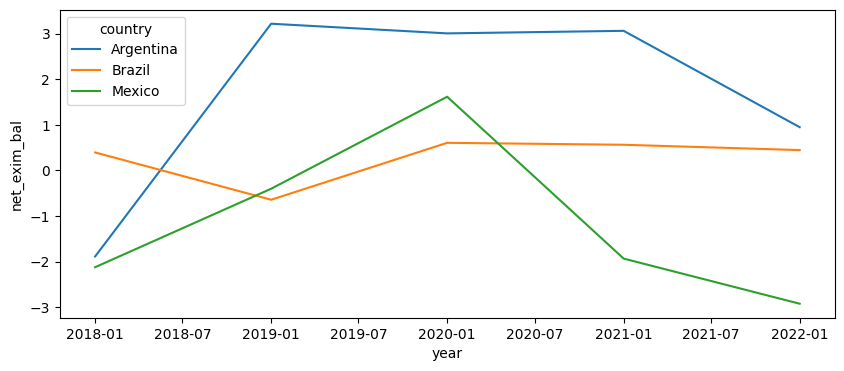

In [61]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

**Argentina:** Showed the most significant improvement initially but experienced a decline after 2021.

**Brazil:** Maintained a stable export-import balance with minor fluctuations around zero.

**Mexico:** Improved significantly until 2020, followed by a sharp decline back into a negative balance.

In [62]:
dff.to_excel("g20_worldbank.xlsx") # Downloading the data to create the Dashaord